In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
city="Houston"
state="TX"
county="HARRIS COUNTY"
# Format city anme to be used in file naming
city_formatted=city.replace(" ", "_")
county_formatted=county.replace(" ", "_")

---------------------------------------------- DATA IMPORT ----------------------------------------------<br>
Sourcing data from https://www.zillow.com/research/data/

In [2]:
# ===================================== LIST & SALE PRICE ===========================================
# Read in list price data
median_list_price_raw_monthly=pd.read_csv("https://files.zillowstatic.com/research/public_v2/mlp/Metro_mlp_uc_sfrcondo_raw_month.csv?t=1622248243") # direct url
list_data=median_list_price_raw_monthly
list_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
0,102001,0,United States,Country,NaN,274900.0,269900.0,270000.0,279000.0,289000.0,298000.0,299900.0,299900.0,299700.0,299000.0,298000.0,297500.0,294900.0,289900.0,289900.0,299000.0,305000.0,315000.0,322000.0,324000.0,319900.0,315000.0,310500.0,309900.0,300000.0,299900.0,299500.0,305000.0,315000.0,318888.0,327000.0,337900.0,340000.0,342400.0,344000.0,343400.0,339000.0,330099.0,329900.0,340000.0,354000.0,372000.0
1,394913,1,"New York, NY",Msa,NY,524000.0,519000.0,519900.0,539000.0,549000.0,554900.0,569000.0,569000.0,559000.0,549900.0,550000.0,559000.0,550000.0,549000.0,549000.0,550000.0,569000.0,575000.0,580000.0,580000.0,575000.0,569900.0,575000.0,579000.0,579000.0,579000.0,575000.0,585000.0,599000.0,599000.0,599000.0,614900.0,630000.0,649000.0,649900.0,655000.0,659000.0,660000.0,669000.0,674900.0,675000.0,668000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,795000.0,799000.0,799000.0,809000.0,840000.0,850000.0,849900.0,849000.0,825000.0,798888.0,780000.0,775000.0,759900.0,749900.0,749000.0,750000.0,780000.0,799880.0,825808.0,840000.0,848000.0,849000.0,839999.0,848000.0,849000.0,849000.0,850000.0,895995.0,899999.0,860000.0,882990.0,928000.0,954000.0,975000.0,959000.0,975000.0,989900.0,999000.0,998000.0,999800.0,1015944.0,999999.0
3,394463,3,"Chicago, IL",Msa,IL,300000.0,297990.0,299000.0,319499.0,338999.0,345000.0,349507.0,344900.0,335000.0,329000.0,324900.0,319000.0,309900.0,299900.0,299900.0,319900.0,338000.0,347500.0,349000.0,345000.0,339000.0,329900.0,325000.0,319900.0,311000.0,300000.0,305000.0,324900.0,330000.0,329000.0,335000.0,345000.0,349900.0,349900.0,350000.0,349000.0,339000.0,332500.0,325000.0,340000.0,349900.0,350000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,339990.0,340990.0,345000.0,350000.0,359990.0,369500.0,369000.0,359500.0,349900.0,343500.0,339900.0,339900.0,339000.0,335000.0,332500.0,339900.0,349900.0,355000.0,359900.0,354000.0,349800.0,344798.0,340000.0,340000.0,339995.0,335000.0,331000.0,337990.0,340000.0,339900.0,349500.0,355000.0,359900.0,359900.0,359999.0,355000.0,350000.0,349900.0,349900.0,352900.0,360000.0,372000.0


In [3]:
# Read in sale price data
sale_data=pd.read_csv("/content/Metro_median_sale_price_uc_SFRCondo_raw_month.csv") # monthly data
median_sale_price_raw_monthly=pd.read_csv("https://files.zillowstatic.com/research/public_v2/median_sale_price/Metro_median_sale_price_uc_SFRCondo_raw_month.csv?t=1622248243") # direct url
sale_data=median_sale_price_raw_monthly
# sale_data=pd.read_csv("data/zillow/Metro_median_sale_price_uc_SFRCondo_smoothed_week.csv") # weekly data
sale_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,...,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31
0,102001,0,United States,Country,NaN,192500.0,196000.0,195000.0,197000.0,201900.0,200000.0,199500.0,190000.0,189900.0,185000.0,185000.0,177066.0,174900.0,174900.0,173000.0,177192.0,183990.0,183000.0,181500.0,175900.0,175000.0,174000.0,178000.0,175000.0,170000.0,175000.0,170000.0,175000.0,180000.0,185000.0,185000.0,180000.0,175000.0,175100.0,178500.0,...,240000.0,235000.0,237500.0,242500.0,245000.0,249000.0,255000.0,250000.0,249500.0,245000.0,243000.0,245245.0,248000.0,243000.0,242700.0,250000.0,253500.0,260000.0,265000.0,263000.0,260000.0,258500.0,259000.0,260000.0,264900.0,256490.0,260000.0,268100.0,268500.0,265000.0,274000.0,284900.0,286000.0,289900.0,290000.0,292500.0,290000.0,285000.0,290000.0,305000.0
1,394913,1,"New York, NY",Msa,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,400000.0,400000.0,400000.0,399000.0,400000.0,412000.0,425000.0,435000.0,434000.0,422500.0,410000.0,410000.0,405000.0,410000.0,410000.0,400000.0,410000.0,415000.0,435000.0,440000.0,430900.0,425000.0,420000.0,420122.0,420000.0,425000.0,425000.0,422000.0,431900.0,434500.0,450000.0,447000.0,457550.0,460000.0,469900.0,477000.0,470000.0,470000.0,475000.0,484000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,510000.0,500000.0,500000.0,489000.0,485000.0,475000.0,450000.0,440000.0,440000.0,420000.0,421000.0,394750.0,406500.0,400000.0,394750.0,415000.0,422500.0,420000.0,410750.0,420000.0,408000.0,405000.0,400000.0,395000.0,385000.0,400000.0,395000.0,410000.0,400000.0,405000.0,400000.0,405000.0,390000.0,395000.0,390000.0,...,619625.0,600000.0,630000.0,636750.0,638000.0,655000.0,660000.0,650000.0,654000.0,643000.0,640000.0,648000.0,630000.0,620000.0,635000.0,645000.0,655000.0,649990.0,660000.0,675000.0,656500.0,660000.0,656000.0,657500.0,668000.0,663750.0,665000.0,687500.0,675000.0,660000.0,690000.0,715000.0,730000.0,740000.0,740000.0,732000.0,730000.0,725000.0,750000.0,780000.0
3,394463,3,"Chicago, IL",Msa,IL,250000.0,246000.0,249900.0,250000.0,255000.0,258500.0,255000.0,245000.0,234000.0,225000.0,225000.0,215000.0,205000.0,214500.0,215000.0,217000.0,225000.0,221500.0,220000.0,210000.0,203000.0,199000.0,200000.0,196700.0,187000.0,200000.0,202500.0,207500.0,219000.0,210000.0,216000.0,199250.0,200000.0,190000.0,190000.0,...,220000.0,216000.0,218520.0,230000.0,239000.0,240000.0,250000.0,244000.0,235000.0,230000.0,223500.0,225000.0,220000.0,218000.0,224000.0,234000.0,241500.0,248000.0,250000.0,250000.0,242500.0,235000.0,233000.0,234000.0,230000.0,225000.0,229000.0,250000.0,260000.0,251750.0,255000.0,265000.0,269400.0,265000.0,269000.0,260000.0,260000.0,253000.0,252000.0,270000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,145000.0,153350.0,152000.0,156000.0,160000.0,160000.0,158000.0,149900.0,149900.0,144584.0,144500.0,136900.0,142000.0,145000.0,145000.0,154500.0,160000.0,158500.0,156900.0,150000.0,147500.0,145080.0,145000.0,136518.0,145000.0,149900.0,152514.0,153000.0,158995.0,159838.0,162000.0,153000.0,148000.0,150000.0,155000.0,...,259950.0,246000.0,255000.0,265000.0,265000.0,275000.0,280000.

In [4]:
# ======================================== INVENTORY ==============================================
# Read in inventory days to pending data
inventory_mean_days_to_pending_raw_monthly=pd.read_csv("http://files.zillowstatic.com/research/public_v2/mean_doz_pending/Metro_mean_doz_pending_uc_sfrcondo_raw_monthly.csv")
# use shorter name acronym "days 2 pending"="d2p"
inventory_d2p_data=inventory_mean_days_to_pending_raw_monthly
inventory_d2p_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
0,102001,0,United States,Country,NaN,76.0,67.0,58.0,53.0,49.0,47.0,49.0,52.0,56.0,58.0,64.0,71.0,73.0,69.0,61.0,55.0,51.0,51.0,54.0,57.0,58.0,60.0,65.0,73.0,73.0,64.0,54.0,53.0,53.0,52.0,50.0,45.0,45.0,41.0,41.0,46.0,NaN,NaN,NaN,NaN
1,394913,1,"New York, NY",Msa,NY,104.0,84.0,71.0,72.0,69.0,69.0,73.0,79.0,83.0,86.0,89.0,98.0,103.0,93.0,89.0,81.0,76.0,80.0,82.0,87.0,92.0,89.0,95.0,104.0,109.0,98.0,94.0,85.0,83.0,72.0,66.0,64.0,64.0,60.0,64.0,74.0,NaN,NaN,NaN,NaN
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,48.0,36.0,33.0,32.0,31.0,33.0,36.0,40.0,43.0,45.0,48.0,58.0,60.0,55.0,49.0,44.0,42.0,43.0,43.0,46.0,49.0,47.0,52.0,57.0,53.0,42.0,34.0,35.0,34.0,37.0,35.0,34.0,31.0,31.0,31.0,36.0,NaN,NaN,NaN,NaN
3,394463,3,"Chicago, IL",Msa,IL,84.0,66.0,47.0,44.0,43.0,42.0,46.0,50.0,54.0,58.0,66.0,79.0,81.0,69.0,57.0,47.0,46.0,46.0,50.0,55.0,60.0,64.0,71.0,85.0,86.0,68.0,55.0,56.0,53.0,50.0,47.0,45.0,43.0,40.0,45.0,52.0,NaN,NaN,NaN,NaN
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,63.0,50.0,44.0,39.0,38.0,40.0,42.0,46.0,50.0,54.0,59.0,63.0,66.0,61.0,55.0,50.0,47.0,49.0,51.0,54.0,57.0,59.0,63.0,68.0,69.0,61.0,54.0,50.0,50.0,49.0,47.0,45.0,44.0,43.0,44.0,46.0,NaN,NaN,NaN,NaN


In [5]:
# Read in for-sale inventory data
for_sale_inventory_raw_monthly=pd.read_csv("https://files.zillowstatic.com/research/public_v2/invt_fs/Metro_invt_fs_uc_sfrcondo_raw_month.csv?t=1622248243")
# use shorter name acronym "for sale"="4s"
inventory_4s_data=for_sale_inventory_raw_monthly
inventory_4s_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
0,102001,0,United States,Country,NaN,1531572.0,1370419.0,1377201.0,1404098.0,1541844.0,1637907.0,1708714.0,1762163.0,1791348.0,1782386.0,1728865.0,1729936.0,1611545.0,1438085.0,1465378.0,1466007.0,1577464.0,1664720.0,1742723.0,1792338.0,1798647.0,1774236.0,1735951.0,1708589.0,1553931.0,1387752.0,1398147.0,1404253.0,1464593.0,1360586.0,1468137.0,1461075.0,1433303.0,1378327.0,1325389.0,1311079.0,1144377.0,997512.0,1030411.0,905733.0,965625.0,978006.0
1,394913,1,"New York, NY",Msa,NY,74613.0,65674.0,65438.0,73283.0,79244.0,86171.0,91298.0,92812.0,92491.0,89806.0,89122.0,90199.0,83108.0,73477.0,74456.0,76447.0,84520.0,91964.0,96878.0,98369.0,96636.0,92364.0,93119.0,90600.0,81826.0,72019.0,71363.0,74546.0,78648.0,64316.0,69187.0,77357.0,82669.0,81013.0,81642.0,80010.0,71003.0,61810.0,60127.0,58213.0,59888.0,62513.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,22375.0,18272.0,19811.0,21876.0,24173.0,25597.0,27795.0,28954.0,30706.0,30999.0,30590.0,31380.0,29436.0,25282.0,26481.0,26938.0,29173.0,30320.0,31976.0,31944.0,32408.0,31512.0,30337.0,29471.0,25383.0,20650.0,21151.0,22226.0,22306.0,20210.0,23490.0,25284.0,26361.0,26420.0,26463.0,26327.0,23211.0,19474.0,19584.0,19536.0,21038.0,20655.0
3,394463,3,"Chicago, IL",Msa,IL,48032.0,40624.0,40447.0,43080.0,51640.0,54117.0,56685.0,58684.0,59813.0,59608.0,58208.0,57546.0,51333.0,43682.0,43356.0,45916.0,52713.0,58354.0,60661.0,62230.0,62384.0,62075.0,61230.0,59253.0,52329.0,44854.0,44975.0,48256.0,50423.0,44743.0,49404.0,52041.0,52386.0,51355.0,49408.0,48487.0,41674.0,34809.0,34656.0,30684.0,33668.0,35698.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,26702.0,23293.0,22855.0,23461.0,26718.0,30068.0,31829.0,33968.0,35956.0,35343.0,34123.0,33369.0,31643.0,28228.0,28949.0,29616.0,32887.0,34833.0,36925.0,40119.0,41016.0,40086.0,38408.0,37622.0,34846.0,31189.0,31002.0,32154.0,33258.0,31389.0,35070.0,34987.0,34051.0,31525.0,28740.0,30137.0,26317.0,22589.0,22951.0,19743.0,21223.0,21906.0


In [6]:
# Read in 5+ bed property values
zhvi_5plus_data=pd.read_csv("https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv")
print("--- Red in 5+ bed data")
# Read in 4 bed property data
zhvi_4_data=pd.read_csv("https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv")
print("--- Red in 4 bed data")
# Read in 3 bed property data
zhvi_3_data=pd.read_csv("https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv")
print("--- Red in 3 bed data")
# Read in 2 bed property data
zhvi_2_data=pd.read_csv("https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv")
print("--- Red in 2 bed data")
# Read in 1 bed property data
zhvi_1_data=pd.read_csv("https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv")
print("--- Red in 1 bed data")
# Read in Condo property data



--- Red in 5+ bed data
--- Red in 4 bed data
--- Red in 3 bed data
--- Red in 2 bed data
--- Red in 1 bed data


In [7]:
# Red in single family homes time searies data by county
single_family_homes_by_county=pd.read_csv("https://files.zillowstatic.com/research/public_v2/zhvi/County_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv")
# Change Region Name column to upper case to stay consistant with other data sources' formatting
single_family_homes_by_county['RegionName']=single_family_homes_by_county['RegionName'].str.upper()
single_family_homes_by_county.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,...,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
0,3101,0,LOS ANGELES COUNTY,County,CA,CA,Los Angeles-Long Beach-Anaheim,6,37,184848.0,184897.0,184987.0,185172.0,185347.0,185562.0,185831.0,185848.0,185707.0,185424.0,185354.0,185264.0,184610.0,183925.0,183398.0,183498.0,183662.0,183807.0,184178.0,185041.0,185957.0,187008.0,187676.0,188784.0,190537.0,192697.0,194599.0,195811.0,197006.0,197992.0,198477.0,...,637428.0,642489.0,647829.0,652219.0,655232.0,658021.0,660600.0,661224.0,661054.0,661125.0,661781.0,661317.0,661105.0,658303.0,655970.0,655186.0,658902.0,663721.0,664521.0,663985.0,663364.0,665374.0,667367.0,671398.0,676323.0,682986.0,690262.0,695172.0,696564.0,696464.0,701906.0,709869.0,718886.0,726452.0,733886.0,740828.0,747631.0,755107.0,762690.0,772608.0
1,139,1,COOK COUNTY,County,IL,IL,Chicago-Naperville-Elgin,17,31,182599.0,181959.0,181164.0,180241.0,178925.0,178150.0,177006.0,177918.0,179014.0,181564.0,183476.0,185103.0,185671.0,185553.0,185646.0,184989.0,185131.0,184358.0,183858.0,179173.0,174064.0,166482.0,160925.0,156399.0,154272.0,153479.0,153008.0,152778.0,152384.0,152029.0,152045.0,...,250176.0,251733.0,252070.0,252362.0,253036.0,254150.0,254608.0,254956.0,255179.0,255423.0,256023.0,256516.0,256769.0,256725.0,257188.0,257735.0,258268.0,258393.0,258426.0,258066.0,256931.0,255757.0,255227.0,255252.0,256291.0,256521.0,257311.0,257302.0,257869.0,258445.0,259845.0,261648.0,264211.0,267006.0,269432.0,271665.0,273397.0,276318.0,279126.0,282938.0
2,1090,2,HARRIS COUNTY,County,TX,TX,Houston-The Woodlands-Sugar Land,48,201,102970.0,103042.0,103053.0,103199.0,103352.0,103449.0,103488.0,103548.0,103720.0,103915.0,104202.0,104505.0,104428.0,104187.0,103934.0,103963.0,103976.0,104108.0,104285.0,104474.0,104575.0,104682.0,104850.0,105009.0,105635.0,106266.0,106940.0,107129.0,107360.0,107533.0,107762.0,...,189251.0,189813.0,190525.0,191614.0,192775.0,193799.0,194612.0,195626.0,196573.0,197317.0,197900.0,198556.0,199706.0,200541.0,201055.0,200964.0,201363.0,202140.0,203097.0,203834.0,203812.0,204179.0,204326.0,204727.0,204523.0,204628.0,205971.0,207444.0,208860.0,209504.0,210457.0,211581.0,213399.0,215083.0,217119.0,219051.0,221311.0,223627.0,225216.0,227085.0
3,2402,3,MARICOPA COUNTY,County,AZ,AZ,Phoenix-Mesa-Scottsdale,4,13,118579.0,118911.0,119287.0,120014.0,120720.0,121357.0,121949.0,122487.0,123022.0,123534.0,124069.0,124594.0,125111.0,125642.0,126120.0,126579.0,127015.0,127455.0,127863.0,128288.0,128767.0,129297.0,129799.0,130299.0,130898.0,131495.0,132047.0,132498.0,132998.0,133533.0,134242.0,...,266459.0,268525.0,270385.0,272251.0,274223.0,276106.0,277771.0,279058.0,280405.0,281411.0,282165.0,283053.0,283816.0,284893.0,285680.0,286293.0,287560.0,289669.0,291985.0,293945.0,295373.0,296987.0,298776.0,300819.0,302410.0,304436.0,306394.0,310602.0,313973.0,317802.0,320913.0,325055.0,329964.0,335269.0,340876.0,346694.0,353398.0,359946.0,367337.0,373456.0
4,2841,4,SAN DIEGO COUNTY,County,CA,CA,San Diego-Carlsbad,6,73,185571.0,185250.0,185078.0,184714.0,184551.0,184430.0,184291.0,184071.0,183868.0,183870.0,183932.0,183869.0,183662.0,183680.0,183958.0,184448.0,184792.0,185119.0,185742.0,186750.0,188090.0,189208.0,190

---------------------------------------------- DATA CLEANING ----------------------------------------------

--- 1. Only retain data for Houston, TX or HARRIS COUNTY, TX

In [8]:
# Filter list & sale data to Houston TX only
list_data_city=list_data[list_data['RegionName'].str.contains(city)]
sale_data_city=sale_data[sale_data['RegionName'].str.contains(city)]
inventory_4s_data_city=inventory_4s_data[inventory_4s_data['RegionName'].str.contains(city)]
inventory_d2p_data_city=inventory_d2p_data[inventory_d2p_data['RegionName'].str.contains(city)]

# Filter and sort by Zip Code
zhvi_5plus_data_city=zhvi_5plus_data[(zhvi_5plus_data['City'].str.contains(city)) & (zhvi_5plus_data['State'].str.contains(state))].sort_values(by=['RegionName'])
zhvi_4_data_city=zhvi_4_data[(zhvi_4_data['City'].str.contains(city)) & (zhvi_4_data['State'].str.contains(state))].sort_values(by=['RegionName'])
zhvi_3_data_city=zhvi_3_data[(zhvi_3_data['City'].str.contains(city)) & (zhvi_3_data['State'].str.contains(state))].sort_values(by=['RegionName'])
zhvi_2_data_city=zhvi_2_data[(zhvi_2_data['City'].str.contains(city)) & (zhvi_2_data['State'].str.contains(state))].sort_values(by=['RegionName'])
zhvi_1_data_city=zhvi_1_data[(zhvi_1_data['City'].str.contains(city)) & (zhvi_1_data['State'].str.contains(state))].sort_values(by=['RegionName'])

# Filter by county
single_family_homes_by_county_clean=single_family_homes_by_county[(single_family_homes_by_county['RegionName'].str.upper()==county) &(single_family_homes_by_county['State'].str.upper()==state)]
single_family_homes_by_county_clean=single_family_homes_by_county_clean.drop(["RegionID","SizeRank","RegionType","StateName","Metro","StateCodeFIPS","MunicipalCodeFIPS"], axis=1)
single_family_homes_by_county_clean.head()

,RegionName,State,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,...,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
2,HARRIS COUNTY,TX,102970.0,103042.0,103053.0,103199.0,103352.0,103449.0,103488.0,103548.0,103720.0,103915.0,104202.0,104505.0,104428.0,104187.0,103934.0,103963.0,103976.0,104108.0,104285.0,104474.0,104575.0,104682.0,104850.0,105009.0,105635.0,106266.0,106940.0,107129.0,107360.0,107533.0,107762.0,107934.0,108114.0,108332.0,108252.0,108165.0,108217.0,108830.0,...,189251.0,189813.0,190525.0,191614.0,192775.0,193799.0,194612.0,195626.0,196573.0,197317.0,197900.0,198556.0,199706.0,200541.0,201055.0,200964.0,201363.0,202140.0,203097.0,203834.0,203812.0,204179.0,204326.0,204727.0,204523.0,204628.0,205971.0,207444.0,208860.0,209504.0,210457.0,211581.0,213399.0,215083.0,217119.0,219051.0,221311.0,223627.0,225216.0,227085.0


In [9]:
print(len(list_data_city), len(sale_data_city), len(inventory_4s_data_city), len(inventory_d2p_data_city))

1 1 1 1


--- 2. Unpivot data to convert multiple date columns of data into a single Date column and a corresponding Value column

In [10]:
list_data_city_reformatted=pd.melt(list_data_city, 
                                  id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName'], 
                                  var_name='Date', 
                                  value_name='MedianListPrice')
sale_data_city_reformatted=pd.melt(sale_data_city, 
                                  id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName'], 
                                  var_name='Date', 
                                  value_name='MedianSalePrice')
inventory_4s_data_city_reformatted=pd.melt(inventory_4s_data_city, 
                                  id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName'], 
                                  var_name='Date', 
                                  value_name='Inventory4Sale')
inventory_d2p_data_city_reformatted=pd.melt(inventory_d2p_data_city, 
                                  id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName'], 
                                  var_name='Date', 
                                  value_name='InventoryDays2Pending')

single_family_homes_by_county_clean_reformatted=pd.melt(single_family_homes_by_county_clean,
                                                        id_vars=['RegionName','State'],
                                                        var_name='Date',
                                                        value_name='SingleFamily_ZHVI')

In [11]:
list_data_city_reformatted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,MedianListPrice
0,394692,6,"Houston, TX",Msa,TX,2017-11-30,314407.0
1,394692,6,"Houston, TX",Msa,TX,2017-12-31,317084.0
2,394692,6,"Houston, TX",Msa,TX,2018-01-31,317337.0
3,394692,6,"Houston, TX",Msa,TX,2018-02-28,321341.0
4,394692,6,"Houston, TX",Msa,TX,2018-03-31,327192.0


In [12]:
sale_data_city_reformatted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,MedianSalePrice
0,394692,6,"Houston, TX",Msa,TX,2008-02-29,152000.0
1,394692,6,"Houston, TX",Msa,TX,2008-03-31,153000.0
2,394692,6,"Houston, TX",Msa,TX,2008-04-30,152000.0
3,394692,6,"Houston, TX",Msa,TX,2008-05-31,157900.0
4,394692,6,"Houston, TX",Msa,TX,2008-06-30,161500.0


In [13]:
inventory_4s_data_city_reformatted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Inventory4Sale
0,394692,6,"Houston, TX",Msa,TX,2017-11-30,34706.0
1,394692,6,"Houston, TX",Msa,TX,2017-12-31,31828.0
2,394692,6,"Houston, TX",Msa,TX,2018-01-31,32421.0
3,394692,6,"Houston, TX",Msa,TX,2018-02-28,32192.0
4,394692,6,"Houston, TX",Msa,TX,2018-03-31,36684.0


In [14]:
inventory_d2p_data_city_reformatted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,InventoryDays2Pending
0,394692,6,"Houston, TX",Msa,TX,2018-01-31,75.0
1,394692,6,"Houston, TX",Msa,TX,2018-02-28,67.0
2,394692,6,"Houston, TX",Msa,TX,2018-03-31,56.0
3,394692,6,"Houston, TX",Msa,TX,2018-04-30,49.0
4,394692,6,"Houston, TX",Msa,TX,2018-05-31,46.0


In [15]:
single_family_homes_by_county_clean_reformatted['Date'] = single_family_homes_by_county_clean_reformatted['Date'].astype('datetime64[ns]')
single_family_homes_by_county_clean_reformatted.head()

,RegionName,State,Date,SingleFamily_ZHVI
0,HARRIS COUNTY,TX,1996-01-31,102970.0
1,HARRIS COUNTY,TX,1996-02-29,103042.0
2,HARRIS COUNTY,TX,1996-03-31,103053.0
3,HARRIS COUNTY,TX,1996-04-30,103199.0
4,HARRIS COUNTY,TX,1996-05-31,103352.0


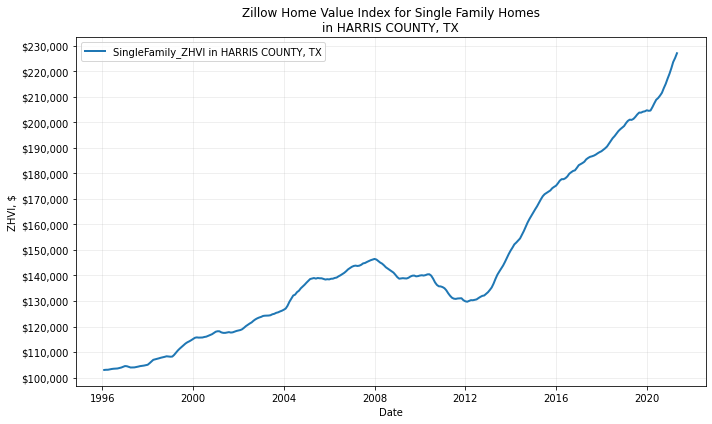

In [16]:
plt.figure(figsize=(10,6))
plt.plot(single_family_homes_by_county_clean_reformatted['Date'], single_family_homes_by_county_clean_reformatted['SingleFamily_ZHVI'], linewidth=2, label=f"SingleFamily_ZHVI in {county}, {state}")
plt.legend()
plt.title(f"Zillow Home Value Index for Single Family Homes\nin {county}, {state}")
plt.xlabel("Date")
plt.ylabel("ZHVI, $")
y_ticks=np.arange(round((single_family_homes_by_county_clean_reformatted['SingleFamily_ZHVI']).min(),-4), round((single_family_homes_by_county_clean_reformatted['SingleFamily_ZHVI']).max()*1.05,-4), 10000)
y_labels=pd.DataFrame(y_ticks)[0].map("${:,.0f}".format).to_list()
plt.yticks(y_ticks,y_labels)
plt.grid(alpha=0.25)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 720x432 with 0 Axes>

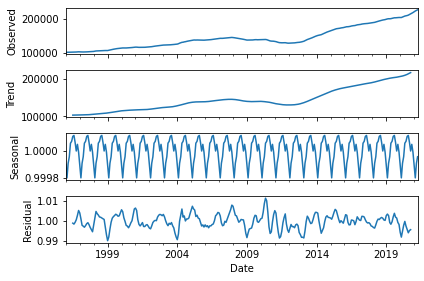

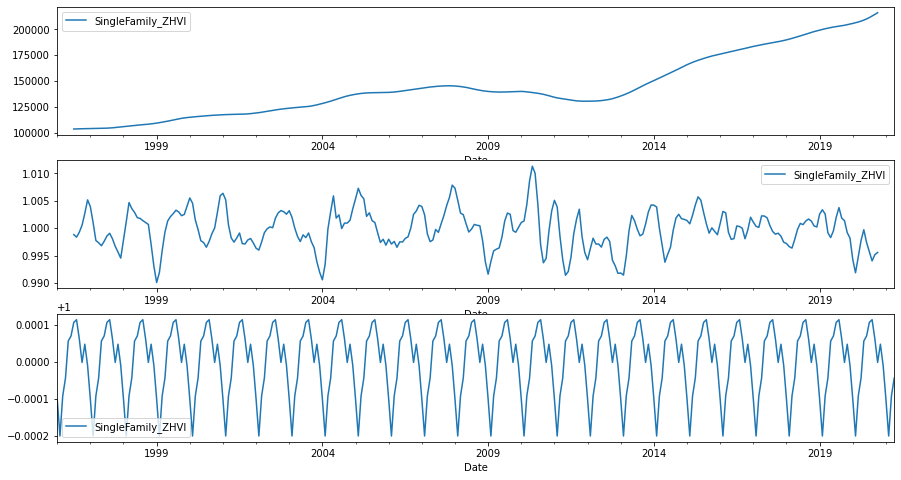

In [17]:
single_family_homes_by_county_clean_reformatted['Date']=pd.to_datetime(single_family_homes_by_county_clean_reformatted['Date'])
single_family_homes_by_county_clean_reformatted.index=single_family_homes_by_county_clean_reformatted['Date']
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(single_family_homes_by_county_clean_reformatted[['SingleFamily_ZHVI']], model='multiplicative')
plt.figure(figsize=(10,6))
res.plot()
plt.show()
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1)
res.resid.plot(ax=ax2)
res.seasonal.plot(ax=ax3)

In [18]:
zhvi_5plus_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,...,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4905188.0,4903238.0,4919344.0,4848840.0,4869287.0,4948003.0,4953988.0,4793412.0,4632119.0,4577180.0,4563561.0,4566879.0,4446987.0,4372109.0,4297217.0,4309417.0,4271291.0,4211197.0,4111523.0,4102129.0,4022154.0,3958351.0,3891681.0,3873738.0,3853385.0,3868754.0,3888536.0,3877755.0,3857952.0,3826728.0,3860275.0,3886630.0,3957506.0,3985167.0,3993336.0,3986334.0,4008618.0,4005854.0,3999991.0,3998027.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,567983.0,565775.0,562455.0,560358.0,558380.0,560146.0,558006.0,562814.0,568473.0,581677.0,592888.0,601398.0,605044.0,605439.0,609221.0,609388.0,611051.0,605711.0,604163.0,590424.0,578476.0,559330.0,548478.0,542139.0,545293.0,555270.0,567425.0,578706.0,588548.0,600781.0,618443.0,...,1526848.0,1532788.0,1526884.0,1523590.0,1521846.0,1521516.0,1517730.0,1512097.0,1509953.0,1509837.0,1512297.0,1514075.0,1512381.0,1508297.0,1507392.0,1506496.0,1507346.0,1506939.0,1506653.0,1506597.0,1499860.0,1495699.0,1492091.0,1491173.0,1495965.0,1498506.0,1502883.0,1502413.0,1503213.0,1504358.0,1508500.0,1512435.0,1519757.0,1525149.0,1530315.0,1533436.0,1533887.0,1537846.0,1541355.0,1548765.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11411496.0,11608027.0,11931325.0,12003334.0,12035432.0,12002447.0,11945047.0,11952512.0,11887909.0,11890103.0,11460986.0,11083662.0,10509315.0,10357144.0,10305312.0,10524600.0,10611563.0,10549861.0,10568877.0,10533219.0,10471561.0,10282507.0,10251295.0,10425948.0,10389219.0,10178076.0,9757048.0,9629054.0,9585152.0,9683998.0,9589408.0,9514937.0,9507264.0,9571802.0,9678708.0,9630385.0,9749765.0,9821652.0,9990991.0,9878928.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,269859.0,269881.0,270917.0,272344.0,273803.0,275090.0,276422.0,275743.0,273049.0,270180.0,270022.0,271195.0,271907.0,272463.0,272222.0,271840.0,271360.0,271433.0,271284.0,273363.0,276776.0,280980.0,281840.0,282011.0,283031.0,284429.0,285044.0,285951.0,287038.0,287656.0,288724.0,...,470567.0,470798.0,470151.0,470068.0,470960.0,471423.0,471173.0,471662.0,472549.0,473110.0,473195.0,471902.0,471897.0,471735.0,471384.0,470310.0,469515.0,470056.0,471186.0,471622.0,472732.0,473204.0,473634.0,473058.0,472352.0,471847.0,472269.0,473537.0,475522.0,477243.0,478513.0,480629.0,482685.0,485925.0,489919.0,495652.0,501470.0,508134.0,515077.0,522438.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,729579.0,726611.0,724820.0,724743.0,721974.0,722471.0,720481.0,731272.0,741283.0,757013.0,769304.0,780507.0,785823.0,789116.0,792254.0,792627.0,796486.0,795312.0,795990.0,774938.0,755747.0,729293.0,714191.0,702502.0,699936.0,705568.0,714775.0,723378.0,733288.0,742708.0,756549.0,...,2001202.0,2005640.0,1998388.0,1994988.0,1996050.0,1997487.0,1994035

--- 3. Merge individual metrics into one summary table

In [19]:
# merge list and sale data frames
list_n_sale_data_city_reformatted=pd.merge(list_data_city_reformatted, sale_data_city_reformatted, on=['RegionID','SizeRank','RegionName','RegionType','StateName','Date'])
# merge inventory "for sale" and "days to pending" data frames
inventory_data_city_reformatted=pd.merge(inventory_4s_data_city_reformatted, inventory_d2p_data_city_reformatted, on=['RegionID','SizeRank','RegionName','RegionType','StateName','Date'])
# merge list&sale and inventory data
all_data_city_reformatted=pd.merge(list_n_sale_data_city_reformatted, inventory_data_city_reformatted, on=['RegionID','SizeRank','RegionName','RegionType','StateName','Date'])

In [20]:
all_data_city_reformatted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,MedianListPrice,MedianSalePrice,Inventory4Sale,InventoryDays2Pending
0,394692,6,"Houston, TX",Msa,TX,2018-01-31,317337.0,218923.0,32421.0,75.0
1,394692,6,"Houston, TX",Msa,TX,2018-02-28,321341.0,223900.0,32192.0,67.0
2,394692,6,"Houston, TX",Msa,TX,2018-03-31,327192.0,230000.0,36684.0,56.0
3,394692,6,"Houston, TX",Msa,TX,2018-04-30,331597.0,239990.0,38603.0,49.0
4,394692,6,"Houston, TX",Msa,TX,2018-05-31,332085.0,242000.0,40677.0,46.0


In [21]:
all_data_city_reformatted['Date'] = all_data_city_reformatted['Date'].astype('datetime64[ns]')
all_data_city_reformatted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,MedianListPrice,MedianSalePrice,Inventory4Sale,InventoryDays2Pending
0,394692,6,"Houston, TX",Msa,TX,2018-01-31,317337.0,218923.0,32421.0,75.0
1,394692,6,"Houston, TX",Msa,TX,2018-02-28,321341.0,223900.0,32192.0,67.0
2,394692,6,"Houston, TX",Msa,TX,2018-03-31,327192.0,230000.0,36684.0,56.0
3,394692,6,"Houston, TX",Msa,TX,2018-04-30,331597.0,239990.0,38603.0,49.0
4,394692,6,"Houston, TX",Msa,TX,2018-05-31,332085.0,242000.0,40677.0,46.0


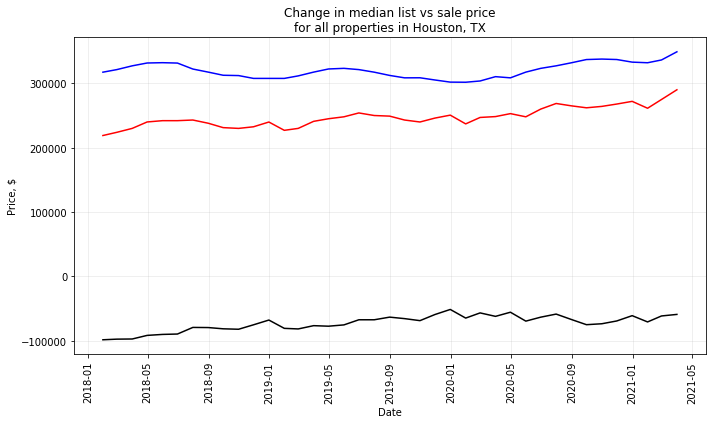

In [22]:
# Plotting list & sale price data
plt.figure(figsize=(10, 6))
plt.plot(all_data_city_reformatted['Date'], all_data_city_reformatted['MedianListPrice'],'b', label="Median monthly list price")
plt.plot(all_data_city_reformatted['Date'], all_data_city_reformatted['MedianSalePrice'],'r', label="Median monthly sale price")
plt.plot(all_data_city_reformatted['Date'], -all_data_city_reformatted['MedianListPrice']+all_data_city_reformatted['MedianSalePrice'],'k', label="Median monthly (sale-list) delta")
plt.xlabel("Date")
plt.ylabel("Price, $")
plt.title(f"Change in median list vs sale price\nfor all properties in {all_data_city_reformatted['RegionName'].unique()[0]}")
plt.grid(alpha=0.25)
plt.xticks(rotation=90)
plt.tight_layout()

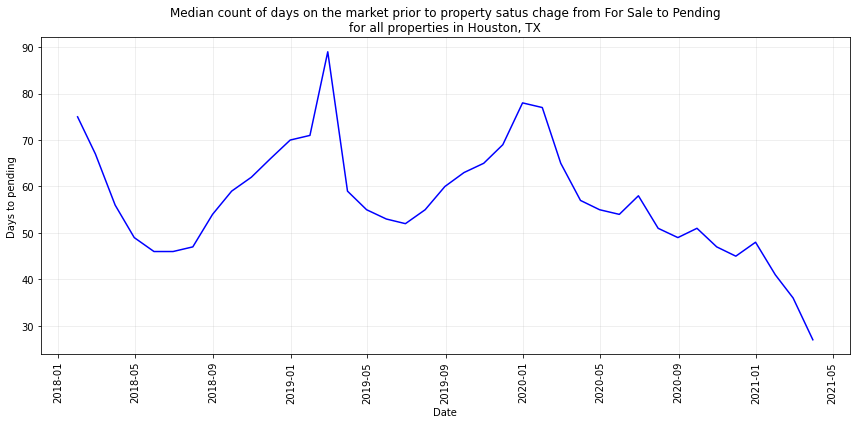

In [23]:
#  Plotting inventory data - Days to Pending
plt.figure(figsize=(12, 6))
plt.plot(all_data_city_reformatted['Date'], all_data_city_reformatted['InventoryDays2Pending'],'b', label="Days to pending")
plt.xlabel("Date")
plt.ylabel("Days to pending")
plt.title(f"Median count of days on the market prior to property satus chage from For Sale to Pending\nfor all properties in {all_data_city_reformatted['RegionName'].unique()[0]}")
plt.grid(alpha=0.25)
plt.xticks(rotation=90)
plt.tight_layout()

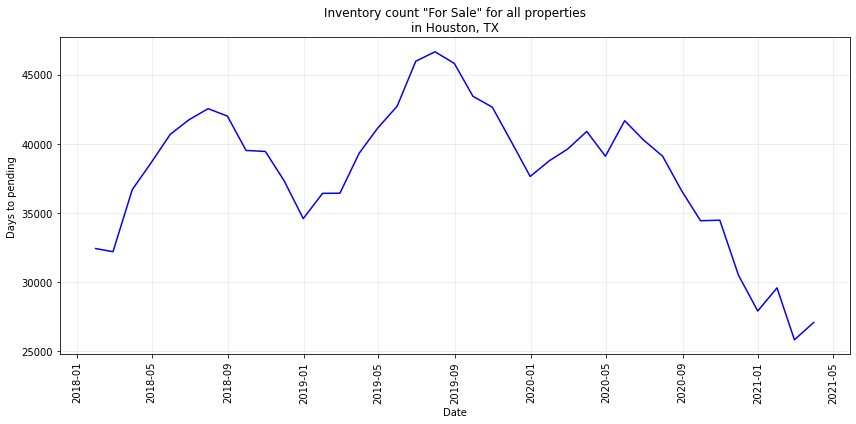

In [24]:
#  Plotting inventory data - Number of properties for sale
plt.figure(figsize=(12, 6))
plt.plot(all_data_city_reformatted['Date'], all_data_city_reformatted['Inventory4Sale'], 'b', label="Inventory For Sale")
plt.xlabel("Date")
plt.ylabel("Days to pending")
plt.title(f"Inventory count \"For Sale\" for all properties\nin {all_data_city_reformatted['RegionName'].unique()[0]}")
plt.grid(alpha=0.25)
plt.xticks(rotation=90)
plt.tight_layout()

In [25]:
# replot with x-axis in calendar Months only
# Create a months and year column in summary DF to use for plotting differentiation
all_data_city_reformatted['Month']=pd.DatetimeIndex(all_data_city_reformatted['Date']).month
all_data_city_reformatted['Year']=pd.DatetimeIndex(all_data_city_reformatted['Date']).year
all_data_city_reformatted['Year'].unique()

array([2018, 2019, 2020, 2021])

In [26]:
all_data_city_reformatted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,MedianListPrice,MedianSalePrice,Inventory4Sale,InventoryDays2Pending,Month,Year
0,394692,6,"Houston, TX",Msa,TX,2018-01-31,317337.0,218923.0,32421.0,75.0,1,2018
1,394692,6,"Houston, TX",Msa,TX,2018-02-28,321341.0,223900.0,32192.0,67.0,2,2018
2,394692,6,"Houston, TX",Msa,TX,2018-03-31,327192.0,230000.0,36684.0,56.0,3,2018
3,394692,6,"Houston, TX",Msa,TX,2018-04-30,331597.0,239990.0,38603.0,49.0,4,2018
4,394692,6,"Houston, TX",Msa,TX,2018-05-31,332085.0,242000.0,40677.0,46.0,5,2018


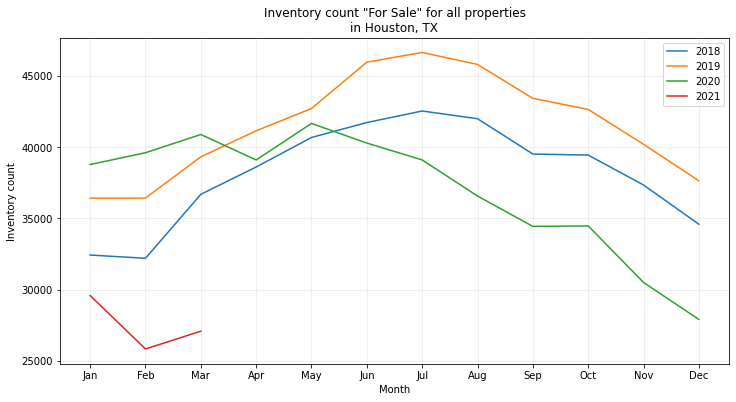

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
for label, grp in all_data_city_reformatted.groupby('Year'):
    grp.plot(x = 'Month', y = 'Inventory4Sale',ax = ax, label = label)
plt.xlabel("Month")
plt.ylabel("Inventory count")
plt.title(f"Inventory count \"For Sale\" for all properties\nin {all_data_city_reformatted['RegionName'].unique()[0]}")
plt.grid(alpha=0.25)
plt.xticks(np.arange(1,13,1),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

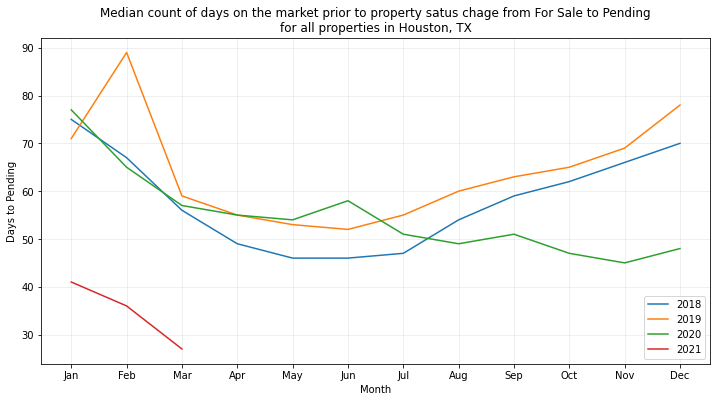

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
for label, grp in all_data_city_reformatted.groupby('Year'):
    grp.plot(x = 'Month', y = 'InventoryDays2Pending',ax = ax, label = label)
plt.xlabel("Month")
plt.ylabel("Days to Pending")
plt.title(f"Median count of days on the market prior to property satus chage from For Sale to Pending\nfor all properties in {all_data_city_reformatted['RegionName'].unique()[0]}")
plt.grid(alpha=0.25)
plt.xticks(np.arange(1,13,1),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()